In [8]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("downloads/Mall_customers.csv")

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

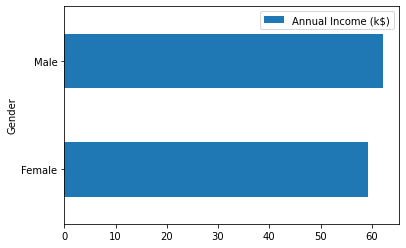

In [11]:
ax = df[['Gender', 'Annual Income (k$)']].groupby('Gender').mean()
bars = ax.plot(kind = 'barh')

Text(0, 0.5, 'Spending Score (1-100)')

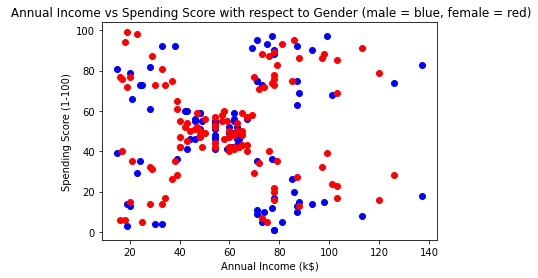

In [16]:
plot_m = df[df['Gender'] == "Male"]
X_m = plot_m[['Annual Income (k$)']]
plot_m_y = plot_m[['Spending Score (1-100)']]


plot_f = df[df['Gender'] == "Female"]
X_f = plot_f[['Annual Income (k$)']]
plot_f_y = plot_f[['Spending Score (1-100)']]

plt.scatter(X_m,plot_m_y, color = 'blue')
plt.scatter(X_f,plot_f_y, color = 'red')
plt.title(' Annual Income vs Spending Score with respect to Gender (male = blue, female = red)')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')

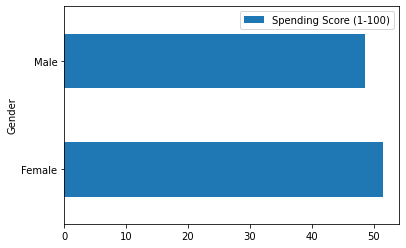

In [58]:
bx = df[['Gender', 'Spending Score (1-100)']].groupby('Gender').mean()
bars = bx.plot(kind = 'barh')

Text(0.5, 1.0, 'Spending Score vs Age')

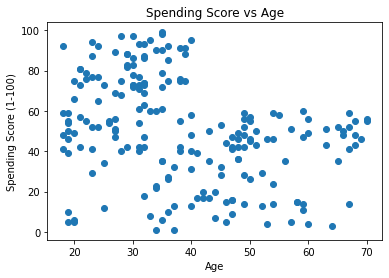

In [17]:
new_df_x = df[['Age']]
new_df_y = df[['Spending Score (1-100)']]
plt.scatter(new_df_x, new_df_y)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title("Spending Score vs Age")

Even thought men have a higher income on average women have a higher spending score on average.

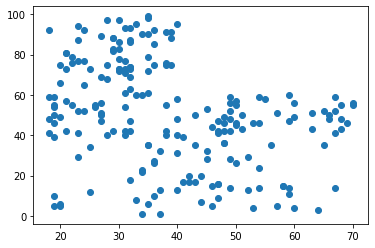

In [4]:
plt.scatter(df[['Age']],df[['Spending Score (1-100)']])

In [26]:
k_rng = range(1,20)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\Joey_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


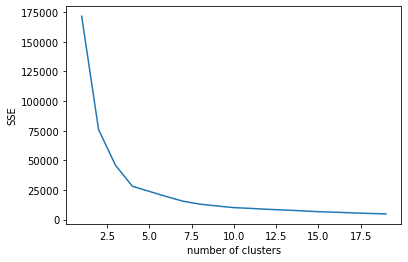

In [27]:
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

Looks like the 'elbow' is around n_clusters = 3 or 4 

In [42]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Spending Score (1-100)']])
df['Cluster'] = y_predicted

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


Text(0.5, 1.0, 'Age vs Spending Score')

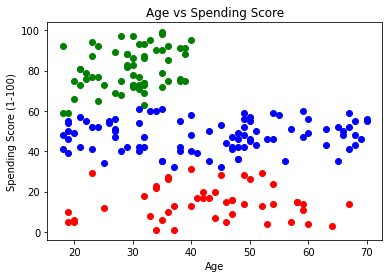

In [43]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
#Just incase want to use n_clusters = 4. Make sure to append section above as well. 
#df4 = df[df.Cluster == 3]

plt.scatter(df1.Age, df1['Spending Score (1-100)'],color ='green')
plt.scatter(df2.Age, df2['Spending Score (1-100)'],color ='red')
plt.scatter(df3.Age, df3['Spending Score (1-100)'],color ='blue')
#plt.scatter(df4.Age, df4['Spending Score (1-100)'],color = 'yellow')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')

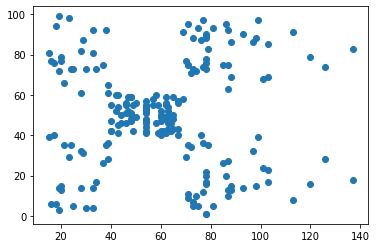

In [38]:
plt.scatter(df[['Annual Income (k$)']],df[['Spending Score (1-100)']])

C:\Users\Joey_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


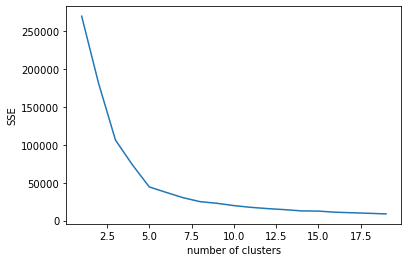

In [52]:
k_rng = range(1,20)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

Elbow seems to be around n_clusters = 5

In [55]:
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Cluster'] = y_predicted

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


Text(0.5, 1.0, 'Income vs Spending Score')

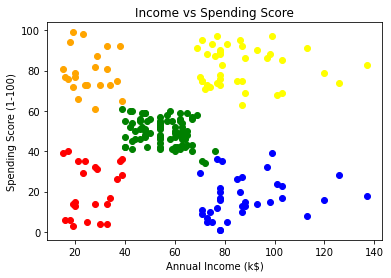

In [56]:
df_1 = df[df.Cluster == 0]
df_2 = df[df.Cluster == 1]
df_3 = df[df.Cluster == 2] 
df_4 = df[df.Cluster == 3]
df_5 = df[df.Cluster == 4]

plt.scatter(df_1['Annual Income (k$)'], df_1['Spending Score (1-100)'],color ='green')
plt.scatter(df_2['Annual Income (k$)'], df_2['Spending Score (1-100)'],color ='red')
plt.scatter(df_3['Annual Income (k$)'], df_3['Spending Score (1-100)'],color ='blue')
plt.scatter(df_4['Annual Income (k$)'], df_4['Spending Score (1-100)'],color = 'yellow')
plt.scatter(df_5['Annual Income (k$)'], df_5['Spending Score (1-100)'],color = 'orange')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')